In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# print(cf.__version__)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

# ------------------------------------------------------------------------
tls.set_credentials_file(username='VIvidh',api_key='5RTkH4bVaeoz7EkYo2ce')
# -------------------------------------------------------------------------

In [6]:
BlackFridayTrain = pd.read_csv('train.csv')

In [7]:
BlackFridayTrain['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

# BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({0: 'unmarried', 1: 'married'})
# BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTrain['Product_Category_2'] = BlackFridayTrain['Product_Category_2'].astype(int)
BlackFridayTrain['Product_Category_3'] = BlackFridayTrain['Product_Category_3'].astype(int)

In [8]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [9]:
# dummy = pd.get_dummies(BlackFridayTrain['Gender'])
# dummy1 = pd.get_dummies(BlackFridayTrain['City_Category'])
# dummy2 = pd.get_dummies(BlackFridayTrain['Marital_Status'])
# dummy3 = pd.get_dummies(BlackFridayTrain['Occupation'])

In [10]:
# BlackFridayTrain = BlackFridayTrain.drop(['Gender','City_Category', 'Marital_Status', 'Occupation'], axis=1)

In [11]:
# BlackFridayTrain = pd.concat([BlackFridayTrain, dummy, dummy1, dummy2, dummy3], axis = 1)

In [12]:
# BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [13]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [14]:
BlackFridayTrain.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [15]:
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
Purchase                      550068 non-null int64
dtypes: int32(2), int64(5), object(5)
memory usage: 46.2+ MB


In [16]:
BlackFridayTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
BlackFridayTrain.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [18]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', yTitle='Total Purchase Amount', title='Total Purchase by Gender')

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan
(see: https://plot.ly/products/cloud ).

In [ ]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [ ]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data")

In [ ]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data")

In [ ]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data")

In [ ]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data")

In [19]:
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2


BlackFridayTrainNew['Gender'] = BlackFridayTrainNew['Gender'].astype(int)
BlackFridayTrainNew['Age'] = BlackFridayTrainNew['Age'].astype(int)
BlackFridayTrainNew['City_Category'] = BlackFridayTrainNew['City_Category'].astype(int)
BlackFridayTrainNew['Stay_In_Current_City_Years'] = BlackFridayTrainNew['Stay_In_Current_City_Years'].astype(int)

In [20]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [21]:
BlackFridayTrainNew.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [22]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [23]:
ageVsGender = BlackFridayTrainNew.groupby(['Age', 'Gender'])['Purchase'].sum().unstack()

In [24]:
ageVsGender

Gender,0,1
Age,,
0,42385978,92527205
1,205475842,708372833
2,442976233,1588794345
3,243438963,783130921
4,116706864,304136539
5,89465997,277633647
6,45782765,154984610


In [25]:
ageVsGender.iplot(kind='bar', title="Gender Distribution across various Age Groups")

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan
(see: https://plot.ly/products/cloud ).

In [26]:
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [27]:
BlackFridayTrainNew['Product_Score'] = 0.0
required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [28]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

In [29]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [30]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.0


In [31]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'Product_Score', p_score)

In [32]:
BlackFridayTrainNew['User_Score'] = 0.0
required_user_data = BlackFridayTrainNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [33]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

In [34]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'User_Score', p_score)

In [35]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745,0.034113
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043,0.034113
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255,0.034113
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383,0.034113
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979,0.075049


In [36]:
BlackFridayTrainNew.to_csv('BlackFridayTrainNew.csv')

In [37]:
BlackFridayTrainNew.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004716,0.004270,0.003688,-0.032458
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.060346,0.026808,0.020456,0.073517
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839,-0.021246,-0.020741,-0.060446
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833,0.011600,0.011679,-0.002929
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.061914,0.040739,0.109546,-0.522198
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422,0.002735,0.001470,-0.000280
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463,-0.011257,-0.010415,0.000678
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703,-0.518270,-0.205178,0.017748
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288,0.444873,0.098062,-0.027482
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501,0.791044,0.262332,-0.050203


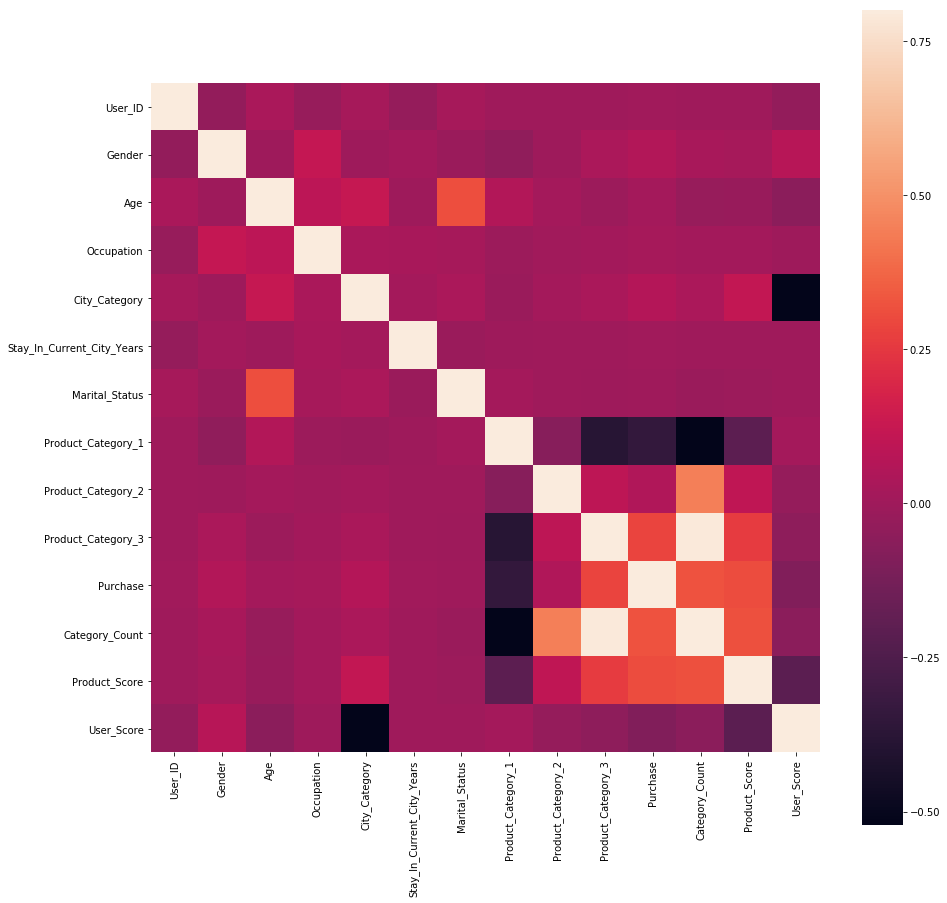

In [38]:
import seaborn as sb
C_mat = BlackFridayTrainNew.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [39]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [40]:
X.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score
0,1000001,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113
1,1000001,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113
2,1000001,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113
3,1000001,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113
4,1000002,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049


In [41]:
X.shape

(550068, 13)

In [42]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# lm = linear_model.LinearRegression()

# model = lm.fit(X_train, y_train)
# predictions = lm.predict(X_test)

# print(predictions.shape)
# print(y_test.shape)

# predictions[0:5]

# mse = np.mean((predictions - y_test)**2)
# print(mse)

# rmse = sqrt(mse)
# print(rmse)

# lm.score(X_test,y_test)

# x_plot = plt.scatter(predictions, (predictions - y_test))
# plt.hlines(y=0, xmin= -1000, xmax=5000)
# plt.title('Residual plot')

# predictors = X_train.columns
# coef = Series(lm.coef_,predictors).sort_values()
# coef.iplot(kind='bar', title='Modal Coefficients')

In [44]:
from sklearn.linear_model import Ridge

BlackFridayTest = pd.read_csv('test.csv')

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X,y)
predictions = ridgeReg.predict(X_test)

#calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", ridgeReg.score(X_test, y_test))

In [45]:
from sklearn.linear_model import Lasso

## training the model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)
predictions = lassoReg.predict(X_test)

# calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", lassoReg.score(X_test, y_test))

In [46]:
from sklearn.linear_model import ElasticNet

## training the model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)
predictions = ENreg.predict(X_test)

#calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", ENreg.score(X_test, y_test))

In [47]:
# # Import the model we are using
# from sklearn.ensemble import RandomForestRegressor

# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor()

# # Train the model on training data
# rf.fit(X_train,y_train)

In [48]:
# # Use the forest's predict method on the test data
# predictions = rf.predict(X_test)

# # Calculate the absolute errors
# errors = abs(predictions - y_test)

# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [49]:
# # Saving feature names for later use
# feature_list = list(X.columns)
# # Convert to numpy array
# features = np.array(X)

In [50]:
# # Get numerical feature importances
# importances = list(rf.feature_importances_)
# # List of tuples with variable and importance
# feature_importances = [(features, round(importance, 2)) for features, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### Testing on Model on Actual Data

In [51]:
BlackFridayTest = pd.read_csv('test.csv')

In [52]:
BlackFridayTest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [53]:
BlackFridayTest['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTest['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTest['Product_Category_2'] = BlackFridayTest['Product_Category_2'].astype(int)
BlackFridayTest['Product_Category_3'] = BlackFridayTest['Product_Category_3'].astype(int)

In [54]:
# BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({0: 'unmarried', 1: 'married'})

In [55]:
# dummy = pd.get_dummies(BlackFridayTest['Gender'])
# dummy1 = pd.get_dummies(BlackFridayTest['City_Category'])
# dummy2 = pd.get_dummies(BlackFridayTest['Marital_Status'])
# dummy3 = pd.get_dummies(BlackFridayTest['Occupation'])

In [56]:
# BlackFridayTest = pd.concat([BlackFridayTest, dummy, dummy1, dummy2, dummy3], axis = 1)

In [57]:
# BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [58]:
BlackFridayTestNew = BlackFridayTest.copy(deep=True)

BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '55+', 'Age'] = 6

BlackFridayTestNew.loc[BlackFridayTestNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'C', 'City_Category'] = 2

BlackFridayTestNew['Gender'] = BlackFridayTestNew['Gender'].astype(int)
BlackFridayTestNew['Age'] = BlackFridayTestNew['Age'].astype(int)
BlackFridayTestNew['City_Category'] = BlackFridayTestNew['City_Category'].astype(int)
BlackFridayTestNew['Stay_In_Current_City_Years'] = BlackFridayTestNew['Stay_In_Current_City_Years'].astype(int)

conditions = [
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] == 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTestNew['Category_Count'] = np.select(conditions, choices, default=0)

In [59]:
BlackFridayTestNew['Product_Score'] = 0.0
required_product_data = BlackFridayTestNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,484
1,P00000242,0.0,170
2,P00000342,0.0,105
3,P00000442,0.0,34
4,P00000542,0.0,80


In [60]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

In [61]:
for index, row in BlackFridayTestNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTestNew.set_value(index, 'Product_Score', p_score)

In [62]:
BlackFridayTestNew['User_Score'] = 0.0
required_user_data = BlackFridayTestNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,12
1,1000002,0.0,30
2,1000003,0.0,12
3,1000004,0.0,1
4,1000005,0.0,45


In [63]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

In [64]:
for index, row in BlackFridayTestNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTestNew.set_value(index, 'User_Score', p_score)

In [65]:
BlackFridayTestNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score
0,1000004,P00128942,1,4,7,1,2,1,1,11,0,2,0.478890,0.002262
1,1000009,P00113442,1,2,17,2,0,0,3,5,0,2,0.141134,0.061086
2,1000010,P00288442,0,3,1,1,4,1,5,14,0,2,0.090470,0.228507
3,1000010,P00145342,0,3,1,1,4,1,4,9,0,2,0.009650,0.228507
4,1000011,P00053842,0,2,1,2,1,0,4,5,12,3,0.258142,0.090498


In [66]:
BlackFridayTestNew.to_csv('BlackFridayTestNew.csv')

## Linear Regression

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression(normalize=True)

In [ ]:
regr.fit(X, y)

In [ ]:
BlackFridayTest = pd.read_csv('test.csv')

In [ ]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [ ]:
y_pred = regr.predict(x_test)

In [ ]:
print(y_pred)

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [ ]:
print('Coefficients: \n', regr.coef_)

In [ ]:
finalsolution.head()

In [ ]:
finalsolution.count()

In [ ]:
finalsolution.to_csv('finalsolution_LinearRegression.csv')

### Result - RMSE 4620.something currently
### Best Solution on Leaderboards - RMSE 2405.something

## Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()

In [ ]:
# Train the model on training data
rf.fit(X,y)

In [ ]:
X_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
BlackFridayTestNew['User_ID'].shape

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [ ]:
finalsolution.head()

In [ ]:
finalsolution.to_csv('finalsolution_RandomForest.csv')

### Result - RMSE 3047.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

## After adding the product score
### Result - RMSE 3010.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

In [ ]:
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X, y, epochs=1, batch_size=16, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
# Load wights file of the best model :
wights_file = 'Weights-005--3903.65557.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
predictions = NN_model.predict(X_test)

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

In [ ]:
finalsolution.head()

In [ ]:
finalsolution.to_csv('finalsolution_TensorFlow.csv')

In [ ]:
import xgboost

In [ ]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [ ]:
X.info()

In [ ]:
xgb.fit(X,y)

In [ ]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [ ]:
predictions = xgb.predict(x_test)

In [ ]:
xgboostsolution = BlackFridayTestNew[['User_ID','Product_ID']]
xgboostsolution['Purchase'] = predictions

In [ ]:
finalsolution.head()

In [ ]:
xgboostsolution.to_csv('finalsolution_XGBoost.csv')

### rmse - 2779.something with 
### rank - 580 among 13000+ participants

In [76]:
# import h2o

# # Number of threads, nthreads = -1, means use all cores on your machine
# # max_mem_size is the maximum memory (in GB) to allocate to H2O
# h2o.init(nthreads = -1, max_mem_size = 16)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 39 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_vivid_nl77dv
H2O cluster total nodes:,1
H2O cluster free memory:,6.087 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [77]:
# train = h2o.import_file("BlackFridayTrainNew.csv")
# test = h2o.import_file("BlackFridayTestNew.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [78]:
# from h2o.automl import H2OAutoML

In [112]:
# x = train.columns
# y = 'Purchase'
# x.remove('Purchase')

In [113]:
x

['C1',
 'User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score']

In [114]:
# aml = H2OAutoML(max_models= 5, seed=1)
# aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_af7450d3544acff7dd659b78e6fb4851> was cancelled by the user.

In [81]:
# preds = aml.leader.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning:

Test/Validation dataset column 'Product_ID' has levels not trained on: [P00012642, P00013042, P00030342, P00038942, P00039042, P00042642, P00056942, P00058842, P00061642, P00062242, P00062542, P00063942, P00074942, P00077642, P00082142, P00082642, P00092742, P00100242, P00105742, P00106242, P00140842, P00156942, P00165542, P00166542, P00168242, P00172942, P00204642, P00227242, P00236842, P00239542, P00249942, P00253842, P00268942, P00270342, P00279042, P00294942, P00300142, P00306842, P00309842, P00312642, P00315342, P00322642, P00322842, P00336842, P00359842, P0099542]



In [116]:
# y_pred = preds.as_data_frame()

In [117]:
# y_pred.head()

,predict
0,14574.902754
1,10993.266289
2,6200.416489
3,2242.596875
4,3464.516816


In [118]:
# finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
# finalsolution['Purchase'] = y_pred

In [119]:
# finalsolution.to_csv('finalsolution_H2O.csv')

### rmse 2727.something
### rank 555